In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# a artificial
a_values = pd.read_csv('../../input_data/a/a_values.csv', sep=';', header=None)
#a_rep_gui = pd.read_csv('output/discr_hat_transformer_10_missing_TRANSPOSED.csv', sep=';', header=0)

# b artificial
b_values = pd.read_csv('../../input_data/b/b_values.csv', sep=';', header=None)
#b_rep_gui = pd.read_csv('output/diff_transformer_10_missing.csv', sep=';', header=0)

# theta artificial
theta_values = pd.read_csv('../../input_data/theta/theta_values.csv', sep=';', header=None)
#theta_rep_gui = pd.read_csv('output/thetas_transformer_10_missing.csv', sep=';', header=0)

## Discriminations

In [4]:
a_results = pd.DataFrame(columns=['a_values'])

a_results['a_values'] = a_values

cols = ['Rep' + str(i+1) for i in range(100)]

for i in range(100):
    rep = np.genfromtxt('a/discr_hat_rep' + str(i+1) + '_jml_25_missing_2.csv', delimiter=';').transpose().flatten()
    rep = rep[rep != 0]

    a_results['Rep' + str(i+1)] = rep

/var/folders/9z/7hm8srmn2c53mf85yzxqqmk40000gn/T/ipykernel_89544/2970165590.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  a_results['Rep' + str(i+1)] = rep


In [5]:
a_results['Bias'] = np.sum(a_values.values - a_results[cols].values, axis=1)/100
a_results['RMSE'] = np.sqrt(np.sum((a_values.values - a_results[cols])**2, axis=1)/100)
a_results['Abs Bias'] = np.sum(np.abs(a_values.values - a_results[cols].values), axis=1)/100

In [6]:
corrs = []

for column in cols:
    corrs.append(a_results['a_values'].corr(a_results[column]))

a_results['Corr'] = ""
a_results['Corr'][0] = np.mean(corrs, axis=0)

/var/folders/9z/7hm8srmn2c53mf85yzxqqmk40000gn/T/ipykernel_89544/2534136238.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_results['Corr'][0] = np.mean(corrs, axis=0)


In [7]:
a_results

,a_values,Rep1,Rep2,Rep3,Rep4,Rep5,Rep6,Rep7,Rep8,Rep9,...,Rep95,Rep96,Rep97,Rep98,Rep99,Rep100,Bias,RMSE,Abs Bias,Corr
0,1.232813,1.377488,1.394601,1.350864,1.359293,1.352379,1.401278,1.393948,1.341612,1.317342,...,1.354896,1.392112,1.339728,1.412925,1.339084,1.381550,-0.173970,0.180780,0.173970,0.448202
1,1.134104,1.320776,1.340167,1.281612,1.283031,1.300396,1.316162,1.333895,1.190037,1.411854,...,1.231636,1.251477,1.361478,1.245909,1.328980,1.307523,-0.180113,0.186339,0.180113,
2,1.738586,39.132920,39.589664,36.765724,38.493246,38.110246,38.879392,34.966428,39.960304,36.839155,...,40.128880,38.981285,38.830028,38.227622,37.752883,39.476534,-36.447472,36.475417,36.447472,
3,2.110506,38.064847,37.885832,39.765410,39.760761,36.113026,36.448530,36.245715,36.020360,34.480789,...,38.263787,38.389367,39.238643,36.861585,41.384324,39.102556,-35.898981,35.950667,35.898981,
4,0.770227,6.040328,5.930130,5.187374,6.654110,5.162481,5.989186,5.161015,5.720457,5.521182,...,6.861050,7.108222,4.805575,4.662778,6.558629,5.000698,-5.212836,5.301209,5.212836,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2.280600,58.454232,55.742921,57.389510,57.088209,58.512287,57.177900,58.434683,57.442715,57.587612,...,58.146263,56.975551,58.043672,58.909673,57.666737,57.312253,-55.481904,55.491754,55.481904,
146,0.711949,6.647926,3.178122,3.757335,4.045356,5.618228,4.253028,5.531617,5.329080,5.696038,...,5.133924,6.100756,5.727775,4.878925,4.127994,4.251406,-3.933776,4.036047,3.933776,
147,0.912646,22.474762,23.503917,25.050844,24.628588,22.349523,23.904340,3.026614,21.081313,24.271571,...,24.609694,21.733707,24.839193,19.488780,23.428612,22.527415,-18.629409,19.638172,18.629409,
148,1.041631,14.345457,19.904515,14.325139,19.882087,19.768908,21.980228,14.160775,16.019448,14.404176,...,16.581344,17.344004,15.661260,20.196221,16.837144,14.531903,-16.817453,17.027422,16.817453,


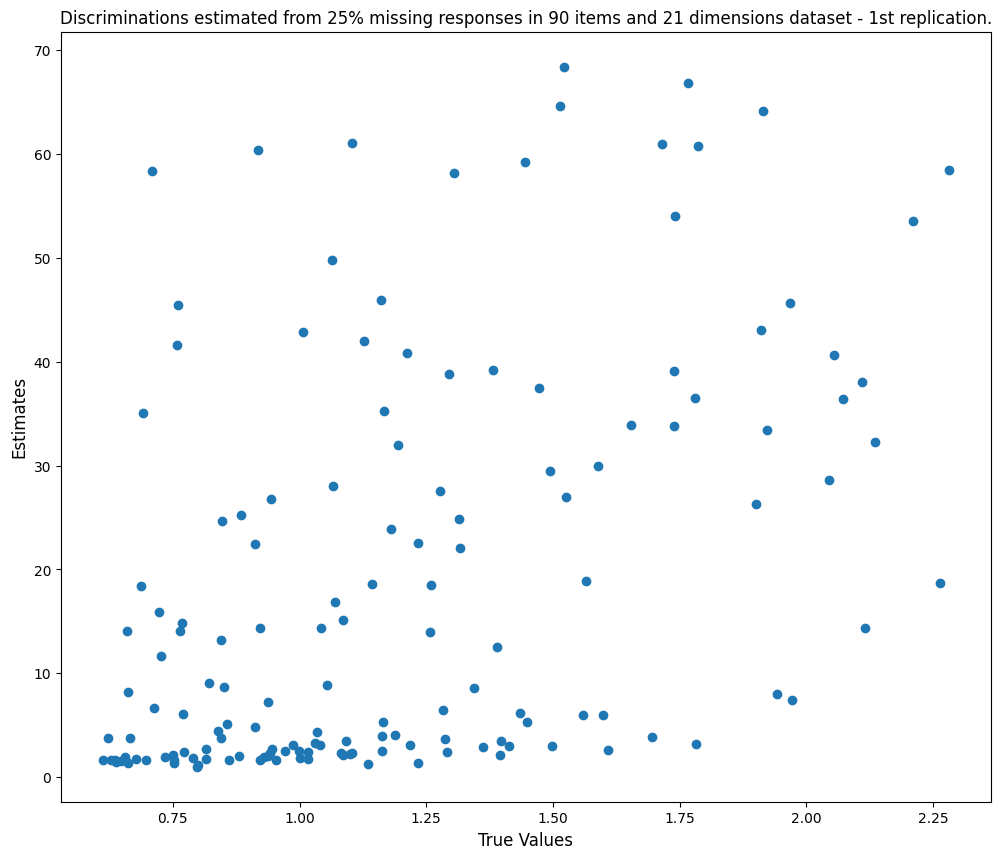

In [8]:
plt.figure(figsize=(12, 10))
plt.scatter(x=a_values.T, y=a_results['Rep1'])
#plt.colorbar()
plt.xlabel('True Values', fontdict={'size': 12})
plt.ylabel('Estimates', fontdict={'size': 12})
plt.title('Discriminations estimated from 25% missing responses in 90 items and 21 dimensions dataset - 1st replication.')
plt.show()

In [10]:
a_results.to_csv('a/a_results.csv', sep=';', header=True, index=False)

## Difficulties

In [12]:
b_results = pd.DataFrame(columns=['b_values'])

b_results['b_values'] = b_values

for i in range(100):
    rep = np.genfromtxt('b/diff_hat_rep' + str(i+1) + '_jml_25_missing_2.csv', delimiter=';')
    b_results['Rep' + str(i+1)] = rep

/var/folders/9z/7hm8srmn2c53mf85yzxqqmk40000gn/T/ipykernel_89544/3949084561.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  b_results['Rep' + str(i+1)] = rep


In [13]:
b_results['Bias'] = np.sum(b_values.values - b_results[cols].values, axis=1)/100
b_results['RMSE'] = np.sqrt(np.sum((b_values.values - b_results[cols])**2, axis=1)/100)
b_results['Abs Bias'] = np.sum(np.abs(b_values.values - b_results[cols].values), axis=1)/100

In [14]:
corrs = []

for column in cols:
    corrs.append(b_results['b_values'].corr(b_results[column]))

b_results['Corr'] = ""
b_results['Corr'][0] = np.mean(corrs, axis=0)

/var/folders/9z/7hm8srmn2c53mf85yzxqqmk40000gn/T/ipykernel_89544/994335258.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_results['Corr'][0] = np.mean(corrs, axis=0)


In [15]:
b_results

,b_values,Rep1,Rep2,Rep3,Rep4,Rep5,Rep6,Rep7,Rep8,Rep9,...,Rep95,Rep96,Rep97,Rep98,Rep99,Rep100,Bias,RMSE,Abs Bias,Corr
0,-1.194972,-1.116205,-1.132717,-1.125756,-1.159943,-1.138068,-1.086025,-1.139250,-1.106747,-1.089214,...,-1.139777,-1.126096,-1.155092,-1.156109,-1.152369,-1.162335,-0.058609,0.062922,0.058609,0.792765
1,1.404483,1.416535,1.432395,1.422305,1.390671,1.365384,1.476603,1.380970,1.390758,1.430300,...,1.381987,1.366551,1.406173,1.357809,1.394753,1.386377,-0.000652,0.027170,0.020961,
2,-1.196988,-1.443251,-1.243640,-1.249483,-1.283900,-1.191069,-1.189309,-1.408643,-1.122250,-1.156993,...,-1.281044,-1.341239,-1.285203,-1.226388,-1.151051,-1.305431,0.048735,0.103450,0.069164,
3,0.472191,0.692098,0.631250,0.654373,0.623125,0.622766,0.626155,0.693559,0.589392,0.723637,...,0.685726,0.646533,0.627166,0.650081,0.804468,0.635658,-0.214633,0.223381,0.214633,
4,1.783818,1.617088,1.723457,1.866019,1.762492,1.711709,1.632499,1.700621,1.889667,1.581324,...,1.801376,1.733842,1.689638,1.677794,1.716725,1.628917,0.066801,0.093828,0.077993,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.527809,-0.394079,-2.563609,-0.347449,-0.571022,-0.411684,-0.158324,-3.389754,0.064391,0.016967,...,-2.922723,-2.268011,-0.485835,-1.746104,-0.264532,-0.481916,1.666267,2.018741,1.666267,
86,-0.749307,-1.687837,-1.736598,-4.196655,-1.771196,-1.759763,-1.798156,-2.223318,-1.610249,-4.205623,...,-1.589808,-2.574640,-1.739262,-1.693358,-1.720374,-1.664706,1.201323,1.341057,1.201323,
87,0.163070,1.135527,1.460163,1.078496,1.439108,1.232211,1.201281,0.541770,1.239851,1.289534,...,1.443256,1.187103,1.544401,1.195710,1.342981,1.138895,-1.022573,1.061253,1.022573,
88,0.928725,1.500051,2.102348,1.491882,1.856723,2.096791,2.047128,2.169528,1.905497,1.610383,...,1.736563,2.031115,1.857289,2.218161,1.832461,1.897351,-1.027444,1.047669,1.027444,


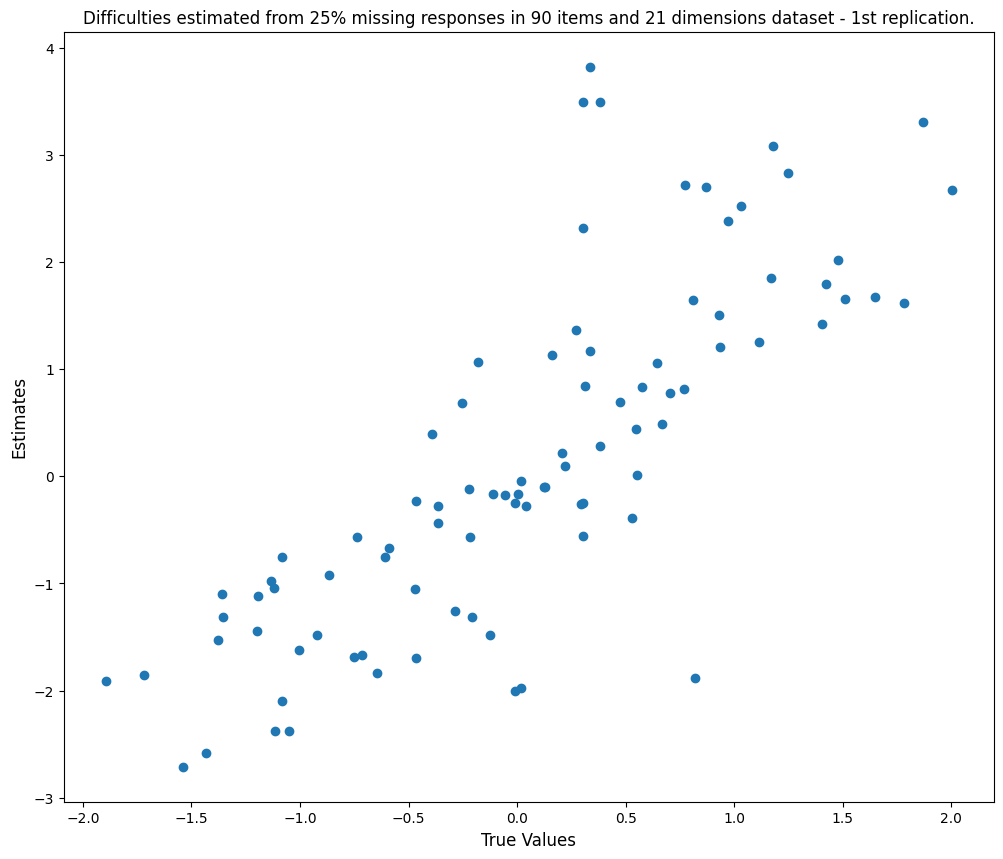

In [16]:
plt.figure(figsize=(12, 10))
plt.scatter(x=b_values.T, y=b_results['Rep1'])
#plt.colorbar()
plt.xlabel('True Values', fontdict={'size': 12})
plt.ylabel('Estimates', fontdict={'size': 12})
plt.title('Difficulties estimated from 25% missing responses in 90 items and 21 dimensions dataset - 1st replication.')
plt.show()

In [17]:
b_results.to_csv('b/b_results.csv', sep=';', header=True, index=False)

## Thetas

In [18]:
theta_values = theta_values.values.reshape((21, 10000))[:, :8000].flatten()

In [20]:
theta_results = pd.DataFrame(columns=['theta_values'])

theta_results['theta_values'] = theta_values

for i in range(100):
    rep = np.genfromtxt('theta/thetas_rep' + str(i+1) + '_jml_25_missing_2.csv', delimiter=';').transpose().flatten()
    theta_results['Rep' + str(i+1)] = rep

/var/folders/9z/7hm8srmn2c53mf85yzxqqmk40000gn/T/ipykernel_89544/2283255080.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  theta_results['Rep' + str(i+1)] = rep


In [21]:
theta_values = theta_values.reshape((theta_values.shape[0], 1))
theta_results['Bias'] = np.sum(theta_values - theta_results[cols].values, axis=1)/100
theta_results['RMSE'] = np.sqrt(np.sum((theta_values - theta_results[cols].values)**2, axis=1)/100)
theta_results['Abs Bias'] = np.sum(np.abs(theta_values - theta_results[cols].values), axis=1)/100

In [22]:
corrs = []

for column in cols:
    corrs.append(theta_results['theta_values'].corr(theta_results[column]))

theta_results['Corr'] = ""
theta_results['Corr'][0] = np.mean(corrs, axis=0)

/var/folders/9z/7hm8srmn2c53mf85yzxqqmk40000gn/T/ipykernel_89544/604505848.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theta_results['Corr'][0] = np.mean(corrs, axis=0)


In [23]:
theta_results

,theta_values,Rep1,Rep2,Rep3,Rep4,Rep5,Rep6,Rep7,Rep8,Rep9,...,Rep95,Rep96,Rep97,Rep98,Rep99,Rep100,Bias,RMSE,Abs Bias,Corr
0,-0.019225,0.657797,0.216396,-0.862266,0.244031,0.099297,0.485432,-0.409281,0.085894,-0.993743,...,0.058023,0.144262,-0.450741,-0.735029,-0.012553,-0.452695,0.119635,0.412640,0.319297,0.574767
1,-1.773350,-1.256136,-0.380999,-2.299941,-1.152590,-0.633446,-0.764683,-1.202629,-0.751187,-1.171961,...,-0.669321,-1.258607,-1.550449,-1.196723,-0.933505,-2.020813,-0.632633,0.788121,0.719272,
2,-0.012759,0.179508,0.361611,0.114009,0.245583,0.210534,1.163569,0.282385,0.225275,0.128343,...,0.251061,0.826102,0.045505,0.179118,-0.008625,0.128912,-0.203261,0.301136,0.206419,
3,0.032244,-0.084238,0.273826,0.218035,-0.068669,-0.086244,0.056936,-0.491041,-0.090222,-0.134966,...,-0.184201,0.091301,0.138455,-0.410775,-0.040307,0.091382,0.169501,0.317548,0.212030,
4,-0.712594,-1.202584,-0.240989,-0.282140,-0.240844,-0.290522,-0.793010,-0.800379,-0.553999,-0.636439,...,-0.164553,-0.798946,-0.380023,-0.352250,-0.167526,-0.198802,-0.142450,0.431761,0.348828,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167995,-0.702055,-0.088256,-0.105052,-0.082019,-0.105001,-0.093581,0.700347,-0.116097,-0.100468,-0.121173,...,-0.093317,-0.483747,-0.116171,-0.098780,-0.087796,-0.078402,-0.636539,0.728631,0.662681,
167996,0.915393,0.025264,0.319979,0.054429,0.389211,0.788959,0.750332,0.163510,-0.742632,0.041007,...,0.057367,0.084070,0.795863,1.062733,0.154777,1.276045,0.617882,0.816922,0.745093,
167997,-0.994150,0.161635,0.491969,-2.412498,-1.855257,-0.057966,0.149997,-0.037895,-0.040263,-0.295674,...,-1.790037,-0.045001,0.234981,-0.046268,-1.549558,-1.846010,-0.522642,0.970188,0.928605,
167998,1.004069,0.094173,0.899080,1.256311,0.549729,0.483585,0.240509,0.887543,1.554102,0.699100,...,1.549182,1.769877,0.253389,0.193525,2.016985,0.794188,0.097854,0.459201,0.393037,


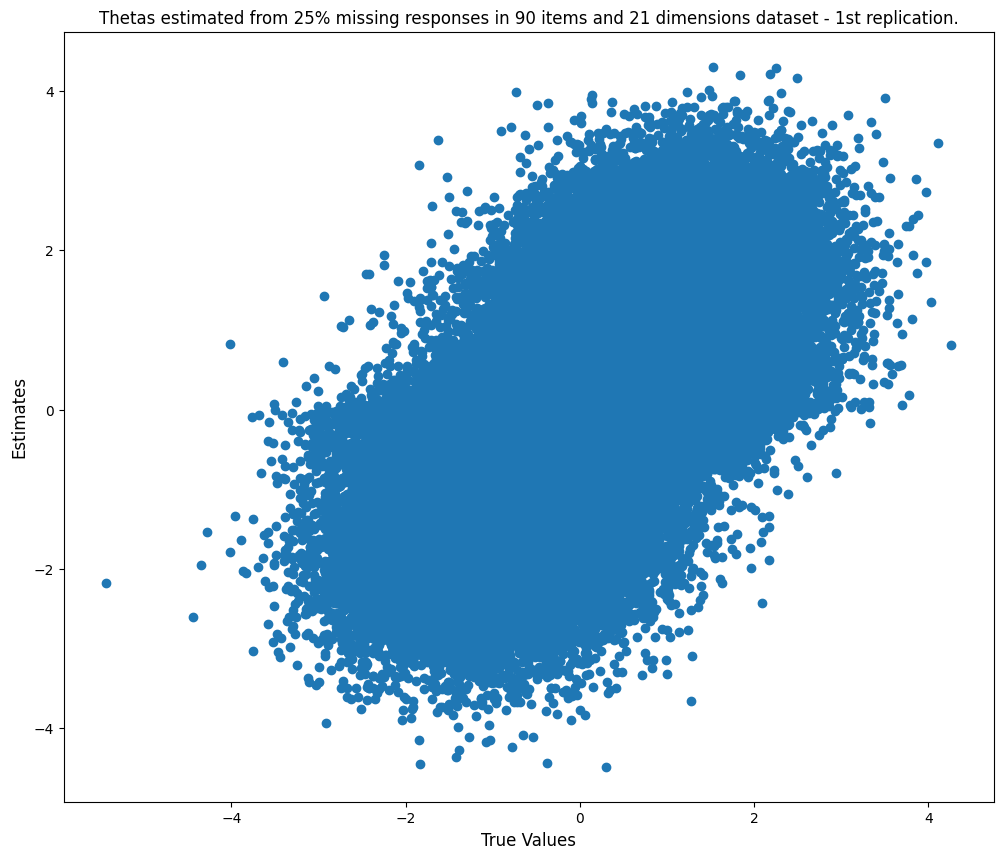

In [24]:
plt.figure(figsize=(12, 10))
plt.scatter(x=theta_values.T, y=theta_results['Rep1'])
#plt.colorbar()
plt.xlabel('True Values', fontdict={'size': 12})
plt.ylabel('Estimates', fontdict={'size': 12})
plt.title('Thetas estimated from 25% missing responses in 90 items and 21 dimensions dataset - 1st replication.')
plt.show()

In [25]:
theta_results.to_csv('theta/theta_results.csv', sep=';', header=True, index=False)